In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib
from pathlib import Path
import shutil

In [2]:
train_df = pd.read_csv('/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/train.csv')
train_df.head()


,image_name,annotation
0,00001.jpg,NaN
1,00002.jpg,NaN
2,00003.jpg,NaN
3,00004.jpg,NaN
4,00005.jpg,0 2076 1559 2369 1695


In [3]:
train_df = train_df.dropna()
train_df.reset_index()

,index,image_name,annotation
0,4,00005.jpg,0 2076 1559 2369 1695
1,5,00006.jpg,0 1368 2587 1692 3039
2,6,00007.jpg,0 944 188 2064 806
3,7,00008.jpg,0 730 1720 1897 2673
4,8,00009.jpg,0 847 1346 1345 1877
...,...,...,...
3995,7991,07992.jpg,0 310 1814 2271 2472;0 430 1598 581 1738;0 279...
3996,7993,07994.jpg,2 402 187 402 209 402 213 402 215 402 217 402 ...
3997,7994,07995.jpg,2 705 203 719 217 730 233 749 261 763 295 783 ...
3998,7997,07998.jpg,0 1072 696 1375 1432


In [123]:
images_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/images/train")
images_path.mkdir(parents=True, exist_ok=True)
labels_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/labels/train")

TRAIN_IMG_PATH = images_path

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 4 to 7998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  4000 non-null   object
 1   annotation  4000 non-null   object
dtypes: object(2)
memory usage: 93.8+ KB


In [6]:
img = train_df.iloc[7]['image_name']
anno = train_df.iloc[7]['annotation']

image = cv2.imread(os.path.join(TRAIN_IMG_PATH,img), cv2.COLOR_RGB2GRAY)


(2957, 2963, 3)


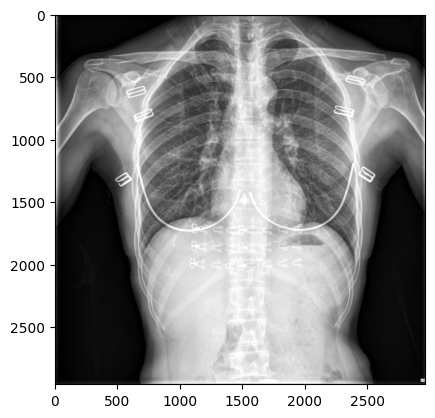

In [7]:
print(image.shape)
plt.imshow(image)


In [8]:
def find_coord(anno):
    
    annotation = anno
    coordinates = [0, 0, 0, 0]

    x1 = coordinates[0] = annotation[1]
    y1 = coordinates[1] = annotation[2]
    x2 = coordinates[2] = annotation[3]
    y2 = coordinates[3] = annotation[4]

    #print(coordinates)
    return [x1, y1, x2,y2]

def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

def bbox_to_ellipse(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    x_c = (bbox[0] + bbox[2]) / 2
    y_c = (bbox[1] + bbox[3]) / 2
    return matplotlib.patches.Ellipse(
        xy=(x_c,y_c), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)


def bbox_to_polygon(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    lis=[]
    for i in range(0,len(bbox),2):
        lis.append([bbox[i],bbox[i+1]])
    # print(lis)
    points=np.array(lis)
    # print(points)
    return matplotlib.patches.Polygon(
        xy=points,edgecolor=color, linewidth=0.5,fill=False)



In [9]:
rect_coordinates = {}
poly_coordinates = {}
ecl_coordinates = {}
rect=poly=ecl=0
dst_path=images_path
rect_list=[]
poly_list=set()
ell_list=[]

for annot in train_df.index:
    isPoly=0
    coord_list = train_df.loc[annot, "annotation"].split(';')
    image_name= train_df.loc[annot, "image_name"]
    for i in coord_list:
        coord= i.split(' ')
        if coord[0]== '0':
            rect+=1
            rect_list.append(image_name)
            # print(train_df.loc[annot]['image_name'])

            if annot not in rect_coordinates:
                rect_coordinates[annot]=[]
            anno = []
            for i in coord:
                anno.append(int(i))
            rect_coordinates[annot].append(anno)
        elif coord[0]=='1':
            ell_list.append(image_name)
            # shutil.copy(src_path, dst_path)
            ecl+=1
            anno = []
            if annot not in ecl_coordinates:
                ecl_coordinates[annot]=[]
            for i in coord:
                anno.append(int(i))
            # ecl_coordinates[annot] = anno
            ecl_coordinates[annot].append(anno)
            # print("Eclipse")
            
        elif coord[0]=='2':
            poly+=1
            anno = []
            isPoly=1
            poly_list.add(image_name)
            if annot not in poly_coordinates:
                poly_coordinates[annot]=[]
            for i in coord:
                anno.append(int(i))
            # print("Polygon")
            poly_coordinates[annot].append(anno)
        # print(coord[0])

In [10]:
len(poly_list)

239

In [11]:
def create_labels(img_name,labels_folder,image_folder,annotations):
    image_id= img_name[:-4]
    # print(image_id)
    image = cv2.imread(os.path.join(images_path, img_name), cv2.COLOR_RGB2GRAY)
    image_height,image_width, image_dim =image.shape
    print(image.shape)
    label_name = str(image_id)+".txt"
    
    with (labels_folder / label_name).open(mode="w") as label_file:
        if annotations!=None:
            coord_list = annotations.split(';')
            for line in coord_list:
                new_line = []
                line=line.split()
                line=list(map(int,line))
                # print(line)
                new_line.append(line[0])
                x_center = (line[1]+ line[3]) / (2*image_width)
                # print(x_center)
                y_center = (line[2] + line[4] )/ (2*image_height)
                width = (line[3] - line[1]) / image_width
                height = (line[4] - line[2]) / image_height
                new_line+=[x_center,y_center,width,height]
                # print(new_line)
                # label_file.write( f"{new_line[0]}"+" "+"{new_line[1]}"+" "+ "{new_line[2]}"+" "+"{new_line[3]}"+ " " +"{new_line[4]}"+"\n")
                label_file.write( f"{new_line[0]} {new_line[1]} {new_line[2]} {new_line[3]} {new_line[4]}\n")
        

In [ ]:
labels_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/labels/train")
labels_path.mkdir(parents=True, exist_ok=True)
k=0
for index, row in train_df.iterrows():
    image_name = row["image_name"]
    anno= row["annotation"]
    if image_name not in poly_list and anno!=None:
        create_labels(image_name,labels_path,images_path,anno)
        k+=1

In [15]:
k

3761

In [116]:
def display_image_annotations(img,labels_path):
    image_id= img[:-4]
    print(os.path.join(images_path, img))
    image = cv2.imread(os.path.join(images_path, img), cv2.COLOR_RGB2GRAY)
    h,w, image_dim =image.shape
    # print(image.shape)
    label_name = str(image_id)+".txt"
    annot_path = os.path.join(labels_path, label_name)
    with open(annot_path, "r") as file:
        annotation_list = file.read().split("\n")[:-1]
        annotation_list = [x.split(" ") for x in annotation_list]
        annotation_list = [[float(y) for y in x ] for x in annotation_list]
    print(annotation_list)
    
    annotations = np.array(annotation_list)
    
    # w,h=image.size
    # print(trans_annot.shape)
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 

    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,4]
    # img= image_path
    image = cv2.imread(os.path.join(images_path, img), cv2.COLOR_RGB2GRAY)
   
    fig = plt.imshow(image)
    # fig = plt.imshow(img)
    
    for ann in transformed_annotations:
        print(ann)
        obj_cls, x0, y0, x1, y1 = ann
        fig.axes.add_patch(plt.Rectangle((x0,y0), width=x1, height=y1,fill=False, edgecolor='red', linewidth=2))

     # plt.Rectangle(
     #    xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
     #    fill=False, edgecolor=color, linewidth=2)

    # for k in annotation_list:
    #     fig.axes.add_patch(bbox_to_rect(find_coord(k), 'red'))
    # # fig.axes.add_patch(bbox_to_rect(find_coord(rect_coordinates[i]), 'red'))   
    # # plt.imshow(np.array(image))
    plt.show()
    

rand= train_df.sample(n=1)

img_name = rand["image_name"]

/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/images/train/00259.jpg
[[0.0, 0.13529191616766467, 0.42141544117647056, 0.2593562874251497, 0.4898897058823529], [0.0, 0.45377994011976047, 0.47541360294117646, 0.1964820359281437, 0.21369485294117646], [0.0, 0.24457335329341318, 0.8017003676470589, 0.2219311377245509, 0.14200367647058823], [0.0, 0.3158682634730539, 0.16544117647058823, 0.06511976047904192, 0.09834558823529412], [0.0, 0.17720808383233533, 0.10500919117647059, 0.050523952095808386, 0.09237132352941177], [0.0, 0.5587574850299402, 0.9018841911764706, 0.059880239520958084, 0.06755514705882353], [0.0, 0.052020958083832336, 0.08846507352941177, 0.03817365269461078, 0.07215073529411764]]
[   0.   15.  384.  693. 1066.]
[  0. 950. 802. 525. 465.]
[   0.  357. 1590.  593.  309.]
[  0. 757. 253. 174. 214.]
[  0. 406. 128. 135. 201.]
[   0. 1413. 1889.  160.  147.]
[  0.  88. 114. 102. 157.]


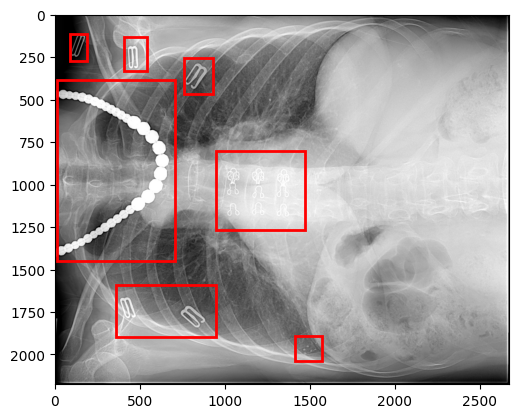

07914.jpg


In [126]:
ind = img_name.index[0]

# display_image_annotations(img_name[ind], labels_path)


display_image_annotations("00259.jpg", labels_path)

print(img_name[ind])

In [90]:
annotations = [os.path.join('dataset/labels/', x) for x in os.listdir('dataset/labels/')]
annotations.sort()

In [ ]:
images = [os.path.join('dataset/images/', x) for x in os.listdir('dataset/images/')]
images.sort()

In [86]:
ls

IdentificationInHalfdataset.ipynb  foreign_object_xrays copy/
Project3.ipynb                     object-CXR/
Untitled.ipynb                     train.csv
dataset/                           yolov5/


In [93]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)


In [100]:
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)


In [103]:
test_images[69]

'dataset/images/05458.jpg'

In [104]:
test_annotations[69]

'dataset/labels/05458.txt'

In [109]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
      try:
          shutil.move(f, destination_folder)
      except:
          print(f)
          assert False

move_files_to_folder(train_images, 'dataset/images/train/')
move_files_to_folder(val_images, 'dataset/images/val/')
move_files_to_folder(test_images, 'dataset/images/test/')





In [118]:
image = cv2.imread('/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/images/train/00005.jpg', cv2.COLOR_RGB2GRAY)

/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/dataset/train/00005.jpg

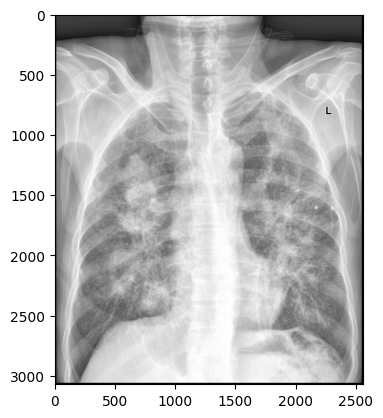

In [120]:
plt.imshow(image)